# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [504]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


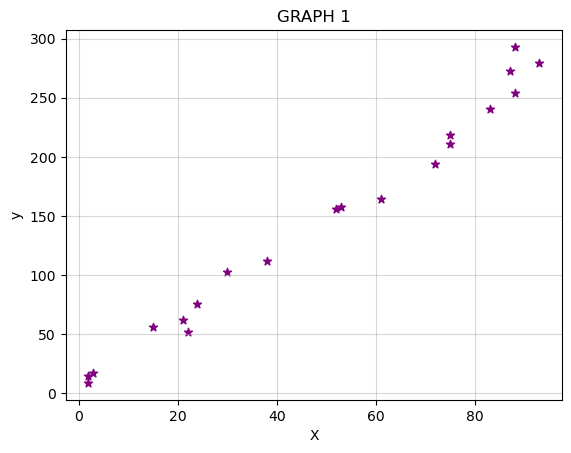

In [507]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
plt.xlabel('X')
plt.ylabel('y')
plt.title("GRAPH 1")
plt.grid(alpha=0.5)
plt.scatter(X, y, color='purple', marker='*')
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [510]:
# Your code for linear regression model
# temporarily use data frame to give X's and y's a second dimension for regression model
# Manually write cost function & gradient descent 

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y)) # Got it from quiz 3.1
    return cost
    

# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    # Iterate to update theta (Got it from quiz 3.1)
    for i in range(iterations):
        # Update theta[0] (intercept term) using the gradient of the cost function
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        
        # Update theta[1] (slope term) using the gradient of the cost function
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:, 1])
        
        # Update theta as a new array with the computed values
        theta = np.array([t0, t1])
    
    return theta


# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
X1 = np.column_stack((np.ones(len(X)), X)) # create new matrix with 1s (np.ones(X.shape[0])), and reshaped X
y1 = y

# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X1, y1, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X1, y1, theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.46266464 2.96267244]
Final cost: 69.69441359034002


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

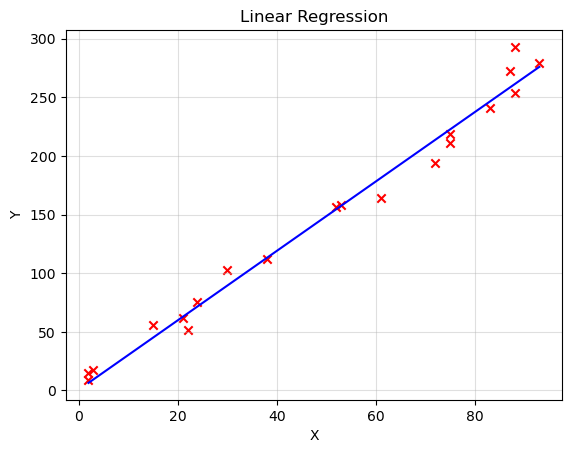

In [512]:
# Compare predictions with actual values
#y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

plt.scatter(X, y, marker='x', color='red')
samples = np.linspace(np.min(X), np.max(X))
plt.plot(samples, theta[0] + theta[1] * samples,color = 'blue')

# plt.plot(X_train, reg.predict(X_train), color = 'Green')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha=0.4)
plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [518]:
import pandas as pd
#read data from Pandas
# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv('Study_hour_Data.csv')

# Display basic information
print(data.info())
print(data.describe())

#Generate your training data X & y
X =  data[['Hours of Study']].values #use column Hours of Study
y =  data[['Passed']].values #use columns Passed
# Test values
tempX_test = np.random.choice(X.flatten(), size=70, replace=False)
tempY_test = np.random.choice(y.flatten(), size=70, replace=False)
# Reshape the results 
X_test = tempX_test.reshape(70, 1)
y_test = tempY_test.reshape(70)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

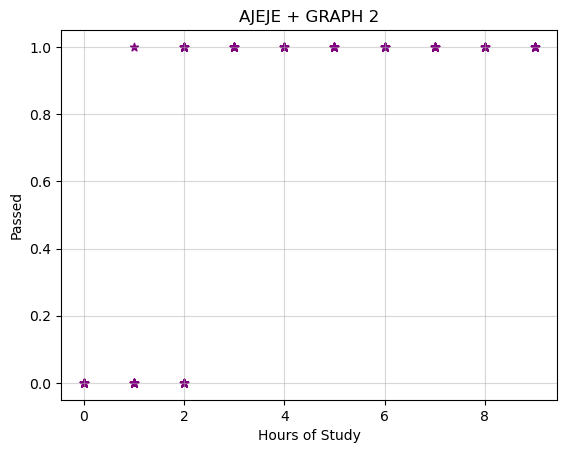

In [520]:
# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

plt.xlabel('Hours of Study')
plt.ylabel('Passed')
plt.title("AJEJE + GRAPH 2")
plt.grid(alpha=0.5)
plt.scatter(X, y, color='purple', marker='*')
plt.show()



#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [523]:
# Your code for logistic regression model

# Sklearn model
import 

# Prepare data

# Building the Model

# Review Model parameter 

SyntaxError: invalid syntax (1272129506.py, line 4)

In [ ]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z)) # Quiz 3.1
    
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    """
    Computes the cost function for logistic regression.
    
    Parameters:
    theta: ndarray
        Model parameters (weights), a 1D array.
    X: ndarray
        Feature matrix where rows are samples and columns are features.
    y: ndarray
        Target values, a 1D array of binary labels (0 or 1).

    Returns:
    float
        The cost value, a measure of how well the model predicts the target values.
    """

    # Number of training examples
    m = len(y)

    # Compute the predicted probabilities using the sigmoid function
    # h represents the model's predictions for each training example
    h = sigmoid(X.dot(theta))

    # Compute the cost function for logistic regression
    # - y.dot(np.log(h)) computes the log loss for correctly predicted examples
    # - (1 - y).dot(np.log(1 - h)) computes the log loss for incorrectly predicted examples
    # -(1 / m) scales the total loss by the number of training examples to compute the average
    cost = -(1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

    return cost
   

# Define the gradient function
def gradient(theta, X, y):
    """
    Computes the gradient of the cost function with respect to the model parameters.
    
    Parameters:
    theta: ndarray
        Model parameters (weights), a 1D array.
    X: ndarray
        Feature matrix where rows are samples and columns are features.
    y: ndarray
        Target values, a 1D array of binary labels (0 or 1).

    Returns:
    ndarray
        Gradient vector, indicating the direction and magnitude of change for each parameter.
    """
    
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta))  # Predicted probabilities using the sigmoid function
    gradient = (1 / m) * X.T.dot(h - y)  # Compute the gradient vector

    return gradient
    

In [526]:
# Train your model
from scipy.optimize import minimize
    
# Add a bias term (intercept) to X 
X = np.column_stack((np.ones(len(X)), X))  # Adds a column of 1s for the intercept
    
# Initialize theta (parameters) to zeros
temp_theta = np.zeros(X.shape[1])

# Reshape y to align
y = y.reshape(-1)

# Minimize the cost function using scipy.optimize
theta = minimize(fun=cost_function, x0=temp_theta, args=(X, y), method='TNC', jac=gradient, options = {'maxfun': 4000})

optimal_theta = theta.x
intercept = optimal_theta[0]  # Intercept
coef = optimal_theta[1:]      # Coefficients

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", optimal_theta)

Optimized theta (parameters): [-7.11710924  3.89184333]


#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [529]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)
    
# Make predictions
X_test_C = np.column_stack((np.ones(len(X_test)), X_test))
predictions = predict(X_test_C, optimal_theta)

In [531]:
# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print("Accuracy:", accuracy, "%")

Accuracy: 62.857142857142854 %


### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

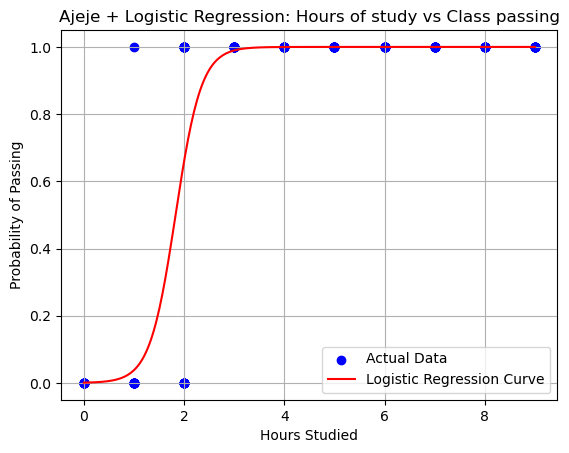

In [534]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
X_second_column = X[:, 1].reshape(-1, 1)
plt.scatter(X_second_column, y, color='blue', label='Actual Data')

# Your chart should plot the regression line using theta_optimal predictions
hours_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
X_range = np.column_stack((np.ones(len(hours_range)), hours_range))
probabilities = sigmoid(X_range.dot(optimal_theta))
plt.plot(hours_range, probabilities, color='red', label='Logistic Regression Curve')

# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Ajeje + Logistic Regression: Hours of study vs Class passing')
plt.legend()
plt.grid()
plt.show()
